# Importation des données et des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels


In [2]:
df = pd.read_csv("2016-building-energy-benchmarking.csv")

L'objectif du projet est de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation à partir de relevés de la ville de Seattle.

Obtenir un modèle pour l'énergie avec un R2 de plus de 0,75 sur le jeu de test et plus de 0,7 pour le CO2.

Objectif = Régression Linéaire Multiple

# Nettoyage des données 

In [3]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In [4]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [5]:
df_corr = df[[
       'CouncilDistrictCode', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']]

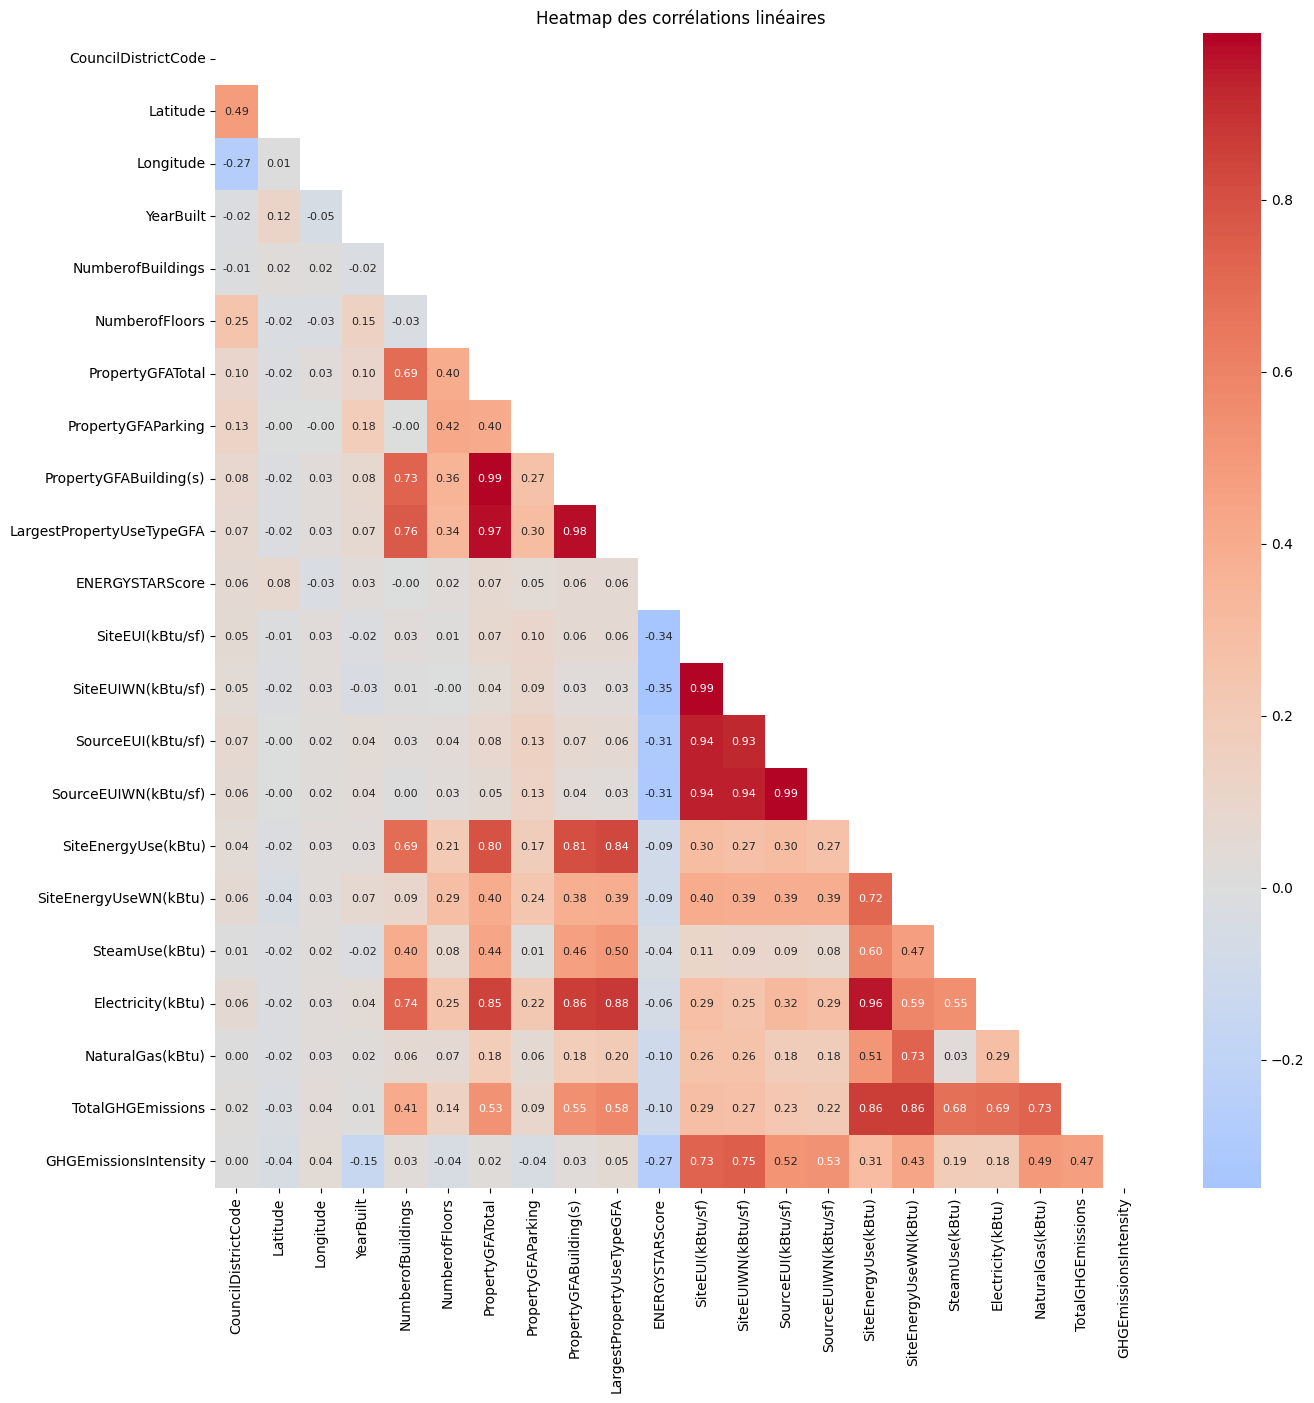

In [6]:
corr = df_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, mask=mask, center=0, cmap="coolwarm")
plt.title("Heatmap des corrélations linéaires")
plt.show()

In [7]:
# Suppression des colonnes inutiles
colonnes_a_supprimer = ['DataYear', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Comments','DefaultData','Latitude', 'Longitude','ENERGYSTARScore','Outlier']
df = df.drop(columns=colonnes_a_supprimer)


In [8]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [9]:
#Données d'habitations à sortir
valeurs_a_supprimer = ['Low-Rise Multifamily', 'Mid-Rise Multifamily', 'High-Rise Multifamily']
condition = ~df['PrimaryPropertyType'].isin(valeurs_a_supprimer)
df = df[condition]
df.reset_index(drop=True, inplace=True)


In [10]:
#Idem
valeurs_a_supprimer2 = ['Multifamily MR (5-9)','Multifamily HR (10+)','Multifamily LR (1-4)']
df = df[~df.BuildingType.isin(valeurs_a_supprimer2)]


In [11]:
#Regroupement de tous les quartiers sous la même appellation exacte
df['Neighborhood'] = df['Neighborhood'].str.upper()

In [12]:
#On sort les campus des habitations + valeurs extrêmes
campus = df['BuildingType'].str.contains('campus', case=False)
df = df.drop(df[campus].index)

In [13]:
renom = {
    'PropertyGFABuilding(s)': 'PropertyGFABuilding',
    'SiteEUI(kBtu/sf)': 'SiteEUI',
    'SiteEUIWN(kBtu/sf)': 'SiteEUIWN',
    'SiteEnergyUse(kBtu)': 'SiteEnergyUse',
    'SiteEnergyUseWN(kBtu)' : 'SiteEnergyUseWN',
    'SteamUse(kBtu)' : 'SteamUse',
    'Electricity(kWh)' : 'Electricity_kW',
    'Electricity(kBtu)': 'Electricity_kBtu',
    'NaturalGas(therms)' : 'NaturalGas_therms',
    'NaturalGas(kBtu)' : 'NaturalGas_kBtu', 
    'SourceEUI(kBtu/sf)' : 'SourceEUI_kBtu_sf',
    'SourceEUIWN(kBtu/sf)' : 'SourceEUIWN_kBtu_sf'
            
}

df.rename(columns=renom, inplace=True)

In [14]:
#[lundi 16:11] Marc Delefosse

#en fouillant, je suis tombé sur les index : 2670, 304 et 578 que j'ai drop parce qu'ils n'avaient pas de données ( NaN ou toutes valeurs d'énergie  à 0 ) si jamais


In [15]:
df.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SiteEUI', 'SiteEUIWN',
       'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf', 'SiteEnergyUse',
       'SiteEnergyUseWN', 'SteamUse', 'Electricity_kW', 'Electricity_kBtu',
       'NaturalGas_therms', 'NaturalGas_kBtu', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [16]:
lignes_avec_zero = df.loc[(df['Electricity_kW'] == 0) & (df['NaturalGas_kBtu'] == 0) & (df['SiteEnergyUse'] == 0)].index
df = df.drop(lignes_avec_zero)

In [17]:
lignes_avec_zero1 = df.loc[(df['TotalGHGEmissions'] == 0)].index

df = df.drop(lignes_avec_zero1)

In [18]:
df.NumberofBuildings.describe()

count    1634.000000
mean        1.034272
std         0.553385
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: NumberofBuildings, dtype: float64

In [19]:
#Gestion des NaN
df['NumberofBuildings'] = df['NumberofBuildings'].replace([None, 0, ''], 1)

In [20]:
lignes_avec_nan = df.loc[(df['SiteEUI'].isna()) & (df['Electricity_kBtu'].isna())].index

# Afficher les lignes
print(lignes_avec_nan)

Index([568, 1453], dtype='int64')


In [21]:
index_a_supprimer = [568, 1453]
df = df.drop(index_a_supprimer)

In [22]:
lignes_avec_nan2 = df.loc[(df['LargestPropertyUseTypeGFA'].isna()) & (df['LargestPropertyUseType'].isna())].index
# Afficher les lignes
lignes_avec_nan2

Index([347, 830, 1378, 1395], dtype='int64')

In [23]:
index_a_supprimer2 = [347, 830, 1378, 1395]
df = df.drop(index_a_supprimer2)

In [24]:
mean_col = df['SiteEnergyUseWN'].mean()
df['SiteEnergyUseWN'] = df['SiteEnergyUseWN'].fillna(mean_col)

mean_col2 = df['SiteEUIWN'].mean()
df['SiteEUIWN'] = df['SiteEUIWN'].fillna(mean_col2)


In [25]:
#Gestion des données manquantes
missing_values_count = df.isna().sum()
missing_values_count

OSEBuildingID                0
BuildingType                 0
PrimaryPropertyType          0
Neighborhood                 0
YearBuilt                    0
NumberofBuildings            0
NumberofFloors               0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding          0
ListOfAllPropertyUseTypes    0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
SiteEUI                      0
SiteEUIWN                    0
SourceEUI_kBtu_sf            0
SourceEUIWN_kBtu_sf          0
SiteEnergyUse                0
SiteEnergyUseWN              0
SteamUse                     0
Electricity_kW               0
Electricity_kBtu             0
NaturalGas_therms            0
NaturalGas_kBtu              0
ComplianceStatus             0
TotalGHGEmissions            0
GHGEmissionsIntensity        0
dtype: int64

In [26]:
#OK

In [27]:
df

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding,...,SiteEnergyUse,SiteEnergyUseWN,SteamUse,Electricity_kW,Electricity_kBtu,NaturalGas_therms,NaturalGas_kBtu,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,DOWNTOWN,1927,1.0,12,88434,0,88434,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83
1,2,NonResidential,Hotel,DOWNTOWN,1996,1.0,11,103566,15064,88502,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86
2,3,NonResidential,Hotel,DOWNTOWN,1969,1.0,41,956110,196718,759392,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19
3,5,NonResidential,Hotel,DOWNTOWN,1926,1.0,10,61320,0,61320,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67
4,8,NonResidential,Hotel,DOWNTOWN,1980,1.0,18,175580,62000,113580,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,50222,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1,12294,0,12294,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70
1716,50223,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1,16000,0,16000,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01
1717,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1,13157,0,13157,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99
1718,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1,14101,0,14101,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57


## Analyse Statistiques

In [28]:
df_corr2 = df[[
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking',
       'LargestPropertyUseTypeGFA',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']]

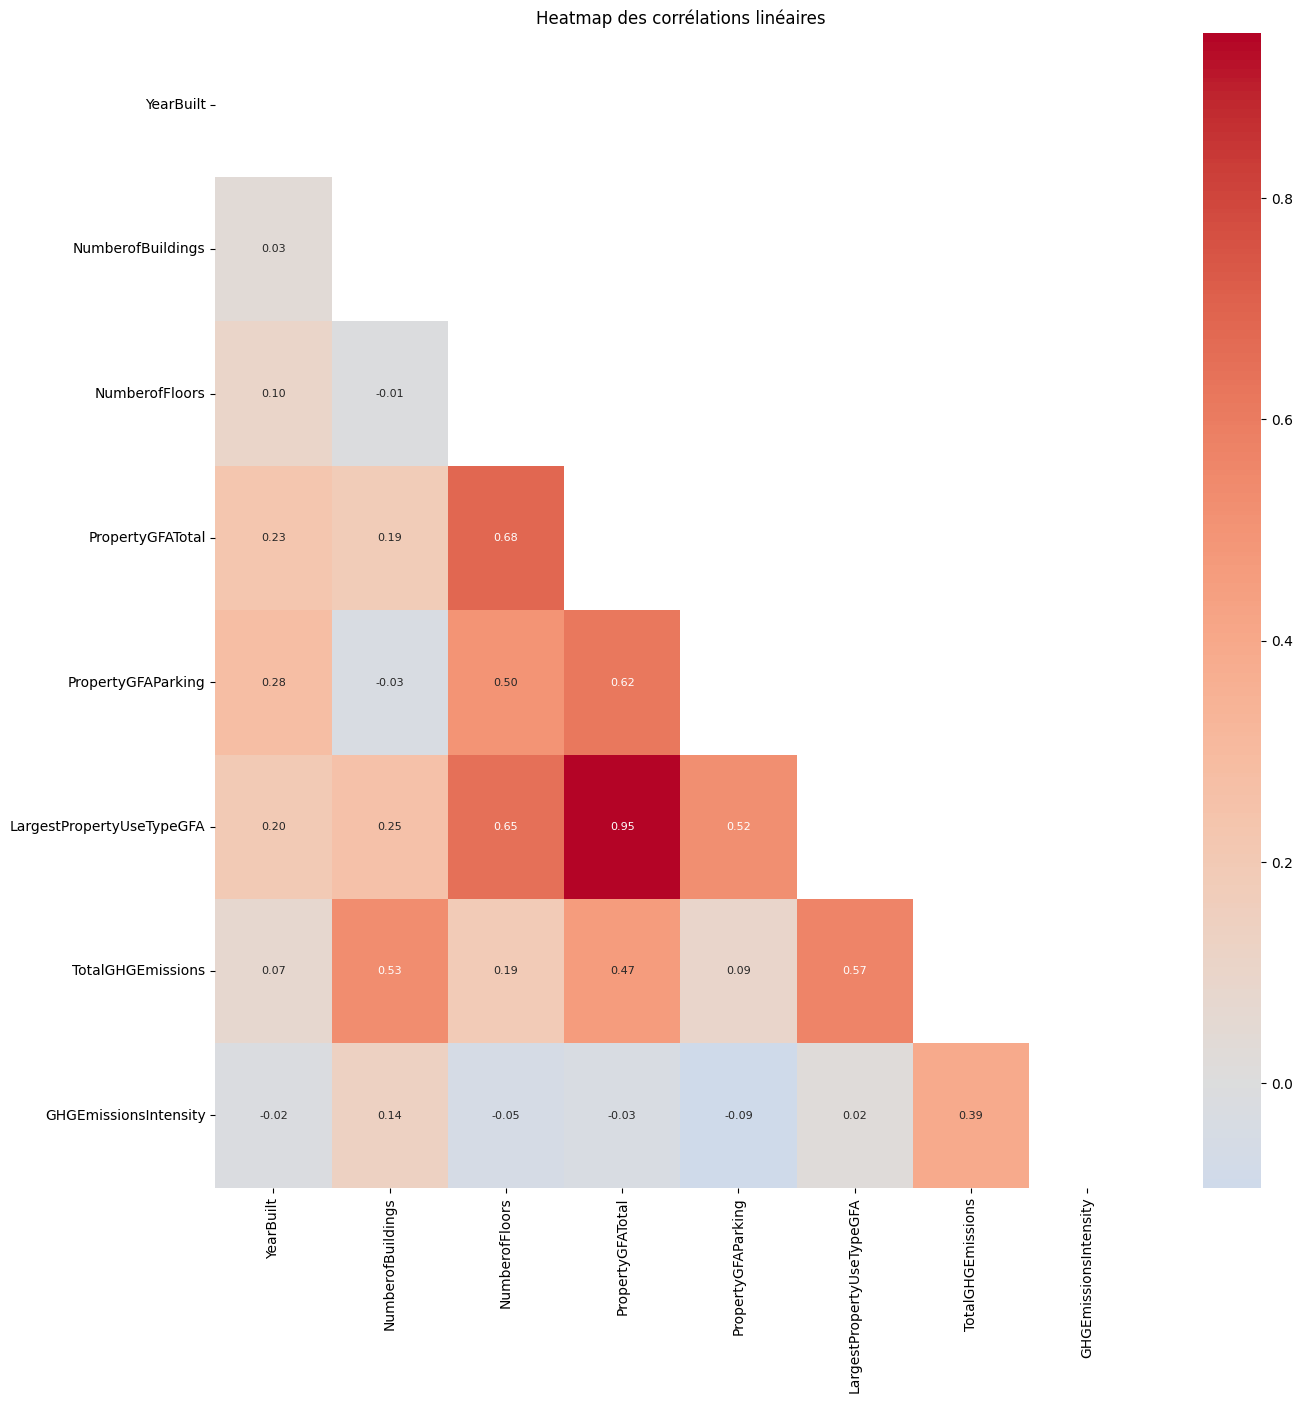

In [29]:
corr = df_corr2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, mask=mask, center=0, cmap="coolwarm")
plt.title("Heatmap des corrélations linéaires")
plt.show()

## Get Dummies

In [30]:
#Passage de df à df2
#get dummies
neighborhood = pd.get_dummies(df.Neighborhood)
df2 = df.join(neighborhood)

In [31]:
primaryPropertyType = pd.get_dummies(df.PrimaryPropertyType)
df3 = df2.join(primaryPropertyType)

In [32]:
buildingType = pd.get_dummies(df.BuildingType)
df4 = df3.join(buildingType)

In [33]:
df4.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SiteEUI', 'SiteEUIWN',
       'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf', 'SiteEnergyUse',
       'SiteEnergyUseWN', 'SteamUse', 'Electricity_kW', 'Electricity_kBtu',
       'NaturalGas_therms', 'NaturalGas_kBtu', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BALLARD', 'CENTRAL',
       'DELRIDGE', 'DELRIDGE NEIGHBORHOODS', 'DOWNTOWN', 'EAST',
       'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH',
       'NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST',
       'Distribution Center', 'Hospital', 'Hotel', 'K-12 School', 'Laboratory',
       'Large Office', 'Medical Office', 'Mixed Use Property', 'Office',
       'Other', 'Refrigerated 

In [34]:
renom2 = {
    'DELRIDGE NEIGHBORHOODS': 'DELRIDGE_NEIGHBORHOODS',
    'GREATER DUWAMISH': 'GREATER_DUWAMISH',
    'LAKE UNION': 'LAKE_UNION',
    'MAGNOLIA / QUEEN ANN': 'MAGNOLIA_QUEEN_ANN',
    'Distribution Center' : 'Distribution_Center',
    'K-12 School' : 'K_12_School',
    'Large Office' : 'Large_Office',
    'Medical Office': 'Medical_Office',
    'Mixed Use Property' : 'Mixed_Use_Property',
    'Refrigerated Warehouse' : 'Refrigerated_Warehouse', 
    'Residence Hall' : 'Residence_Hall',
    'Retail Store' : 'Retail_Store',
    'Self-Storage Facility' : 'Self_Storage_Facility',
    'Senior Care Community' : 'Senior_Care_Community',
    'Small- and Mid-Sized Office ' : 'Small_and_Mid_Sized_Office',
    'Supermarket / Grocery Store' : 'Supermarket_Grocery_Store',
    'Worship Facility' : 'Worship_Facility',
    'Nonresidential COS' : 'Nonresidential_COS',
    'Nonresidential WA' : 'Nonresidential_WA',
    'SPS-District K-12' : 'SPS_District_K_12',    
            
}

df4.rename(columns=renom2, inplace=True)

# OLS - Ordinary Least Squares Regression

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels


In [36]:
renom3 = {
    'MAGNOLIA / QUEEN ANNE': "MAGNOLIA_QUEEN_ANN",
    'Small- and Mid-Sized Office' : 'Small_and_Mid_Sized_Office'
            
}

df4.rename(columns=renom3, inplace=True)

In [37]:
df4.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SiteEUI', 'SiteEUIWN',
       'SourceEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf', 'SiteEnergyUse',
       'SiteEnergyUseWN', 'SteamUse', 'Electricity_kW', 'Electricity_kBtu',
       'NaturalGas_therms', 'NaturalGas_kBtu', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'BALLARD', 'CENTRAL',
       'DELRIDGE', 'DELRIDGE_NEIGHBORHOODS', 'DOWNTOWN', 'EAST',
       'GREATER_DUWAMISH', 'LAKE_UNION', 'MAGNOLIA_QUEEN_ANN', 'NORTH',
       'NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST',
       'Distribution_Center', 'Hospital', 'Hotel', 'K_12_School', 'Laboratory',
       'Large_Office', 'Medical_Office', 'Mixed_Use_Property', 'Office',
       'Other', 'Refrigerated_War

In [38]:
import pandas as pd

# Supposons que vous ayez déjà chargé votre dataframe 'df'

# Comptez le nombre d'occurrences de chaque valeur dans le dataframe
value_counts = df4['LargestPropertyUseType'].value_counts()

# Liste des valeurs ayant moins de 18 occurrences
values_to_group = value_counts[value_counts < 18].index.tolist()

# Créez une nouvelle colonne 'col_name_other' pour stocker les valeurs 'Other'
df4['LargestPropertyUseType'] = df4['LargestPropertyUseType'].apply(lambda x: 'Other' if x in values_to_group else x)

In [39]:
df4['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Office                                   495
Other                                    257
Non-Refrigerated Warehouse               199
K-12 School                              132
Retail Store                              97
Hotel                                     76
Worship Facility                          71
Distribution Center                       54
Medical Office                            41
Supermarket/Grocery Store                 40
Other - Recreation                        31
Parking                                   29
Self-Storage Facility                     27
Residence Hall/Dormitory                  22
Other - Entertainment/Public Assembly     21
Senior Care Community                     20
College/University                        18
Name: count, dtype: int64

In [ ]:
#Valeur cible = 

In [104]:
anova = smf.ols('TotalGHGEmissions ~  + Neighborhood  + NumberofBuildings + NumberofFloors + PropertyGFATotal +PropertyGFABuilding  + ListOfAllPropertyUseTypes +LargestPropertyUseType  + LargestPropertyUseTypeGFA + ComplianceStatus +Large_Office + Mixed_Use_Property + Refrigerated_Warehouse  + NonResidential + -1' , data = df4).fit()
table = sm.stats.anova_lm(anova)
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     11.18
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.16e-235
Time:                        14:13:45   Log-Likelihood:                -11380.
No. Observations:                1630   AIC:                         2.355e+04
Df Residuals:                    1236   BIC:                         2.567e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

In [ ]:
anova = smf.ols('TotalGHGEmissions ~ BuildingType + PrimaryPropertyType + Neighborhood + YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuilding + ListOfAllPropertyUseTypes + LargestPropertyUseType + LargestPropertyUseTypeGFA + ComplianceStatus + BALLARD + CENTRAL + DELRIDGE + DELRIDGE_NEIGHBORHOODS + DOWNTOWN + EAST + GREATER_DUWAMISH + LAKE_UNION + MAGNOLIA_QUEEN_ANN + NORTH + NORTHEAST + NORTHWEST + SOUTHEAST + SOUTHWEST + Distribution_Center + Hospital + Hotel + K_12_School + Laboratory + Large_Office + Medical_Office + Mixed_Use_Property + Office + Other + Refrigerated_Warehouse + Residence_Hall + Restaurant + Retail_Store + Self_Storage_Facility + Senior_Care_Community + Small_and_Mid_Sized_Office + Supermarket_Grocery_Store + University + Warehouse + Worship_Facility + NonResidential + Nonresidential_COS + Nonresidential_WA + SPS_District_K_12 -1' , data = df4).fit()
print(anova.summary())

In [111]:
etaj = df4.NumberofFloors.unique()

In [113]:
etaj.sort_values()

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'